
# ⚙️ 02_Preprocessing — Попередня обробка даних
**Project:** Прогнозування Відтоку Клієнтів  
**Author:** Volodymyr Vakula  
**Team Lead:** Vitalii Subbotin  
**Date:** 2025-10-09
---


In [ ]:
# from google.colab import files
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC, LinearSVC

In [ ]:
# uploaded = files.upload()

Saving internet_service_churn.csv to internet_service_churn.csv


In [3]:
BASE_DIR = Path("..")
DATA_PATH = BASE_DIR / "data" / "internet_service_churn.csv"

In [4]:
df = pd.read_csv(DATA_PATH)
df

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [ ]:
# df = pd.read_csv('internet_service_churn.csv')
# df

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


Категоріальних ознак немає, усі ознаки числові (бінарні для категорій).

In [5]:
df.duplicated().sum()

0

Дублікатів немає.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


Формат ознак числовий, є ознаки з пропущеними значеннями.

In [7]:
df.isna().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

Три ознаки мають пропущені значення.

In [8]:
df.isna().sum() / df.shape[0] * 100

id                              0.000000
is_tv_subscriber                0.000000
is_movie_package_subscriber     0.000000
subscription_age                0.000000
bill_avg                        0.000000
reamining_contract             29.847525
service_failure_count           0.000000
download_avg                    0.527161
upload_avg                      0.527161
download_over_limit             0.000000
churn                           0.000000
dtype: float64

Ознаки download_avg та upload_avg мають 0,5% пропущених значень, користувачів з пропущеними значенями для цих ознак можна видалити, оскільки їхня кількість дуже незначна. Ознака reamining_contract має 29,8% пропущених значень. Видалення користувачів з відсутніми значеннями цієї ознаки може негативно вплинути на метрики моделей внаслідок суттєвого зменшення датасету, тому варто розглянути принаймні 2 варіанти: видалення таких користувачів та заміна відсутніх значень середніми значеннями ознаки. Також можна спробувати інші варіанти.

Розглянемо кореляцію ознаки reamining_contract з цільовою ознакою churn.

In [9]:
df[['reamining_contract', 'churn']].corr()

,reamining_contract,churn
reamining_contract,1.00000,-0.62545
churn,-0.62545,1.00000


Кореляція є значною. Перевіримо, як корелює відсутність значень ознаки reamining_contract з цільовою ознакою.

In [10]:
df['reamining_contract_missing'] = df['reamining_contract'].isna().astype(int)
df

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,reamining_contract_missing
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1,0
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1,0
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1,0
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1,0
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1,0


In [10]:
df[['reamining_contract_missing', 'churn']].corr()

,reamining_contract_missing,churn
reamining_contract_missing,1.000000,0.472366
churn,0.472366,1.000000


Відсутність значень сильно корелює з цільовою ознакою. Це означає, що треба або відкидати користувачів з відсутніми значеннями, або підставляти середні (або інші) значення на місце відсутніх, але при цьому використовувати додаткову ознаку в датасеті - reamining_contract_missing.

Подивимося на кореляції між ознаками.

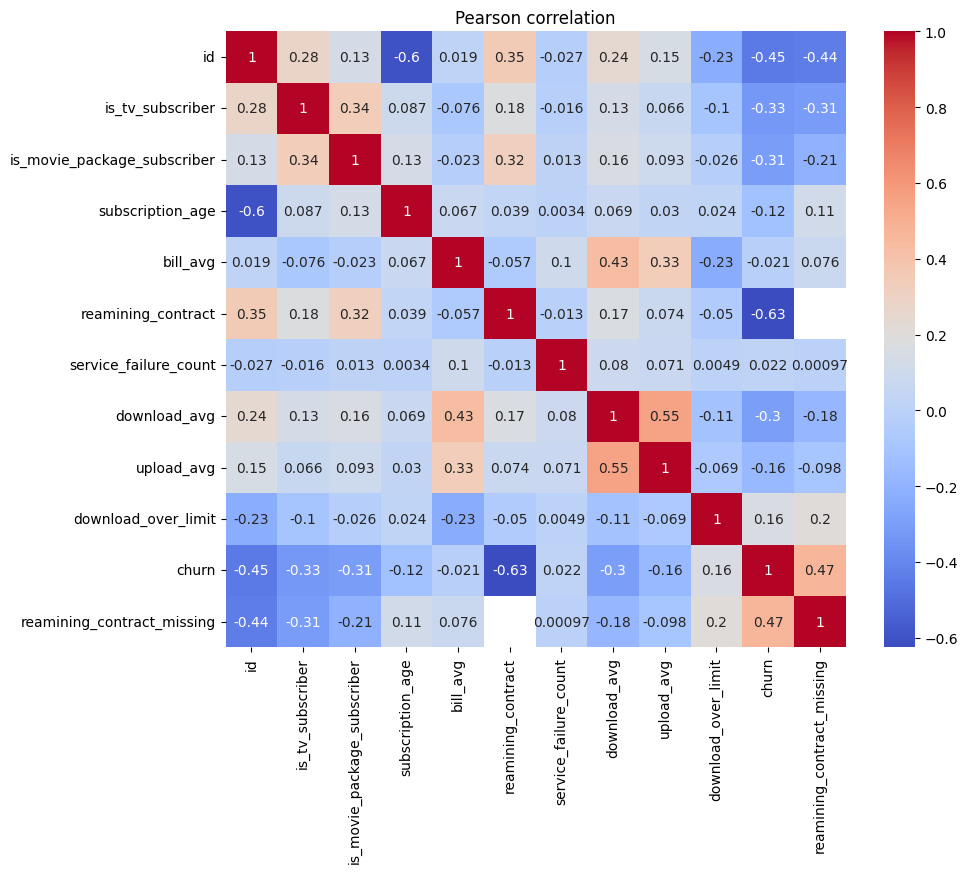

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Pearson correlation")
plt.show()

Немає ознак, що сильно корелюють між собою (дублюють одна одну). Проаналізуємо кореляцію з цільовою ознакою.

In [12]:
df.corr()['churn'].abs().sort_values()

,churn
bill_avg,0.021058
service_failure_count,0.021575
subscription_age,0.122441
download_over_limit,0.158318
upload_avg,0.162690
download_avg,0.298063
is_movie_package_subscriber,0.307167
is_tv_subscriber,0.327582
id,0.451142
reamining_contract_missing,0.472366


Дві ознаки - bill_avg та service_failure_count - мають дуже малу лінійну кореляцію з цільовою ознакою. Подивимось на нелінійну кореляцію.

In [13]:
df.corr(method='spearman')['churn'].abs().sort_values()

,churn
service_failure_count,0.010306
bill_avg,0.027439
subscription_age,0.058399
download_over_limit,0.160038
is_movie_package_subscriber,0.307167
is_tv_subscriber,0.327582
id,0.451215
upload_avg,0.456790
reamining_contract_missing,0.472366
download_avg,0.480291


In [14]:
df.corr(method='kendall')['churn'].abs().sort_values()

,churn
service_failure_count,0.010085
bill_avg,0.022935
subscription_age,0.047738
download_over_limit,0.158210
is_movie_package_subscriber,0.307167
is_tv_subscriber,0.327582
id,0.368418
upload_avg,0.378849
download_avg,0.396223
reamining_contract_missing,0.472366


Нелінійна кореляція service_failure_count та bill_avg з цільовою ознакою теж дуже незначна (0,01-0,02), отже ці ознаки можна спробувати відкинути.

In [15]:
df['churn'].value_counts()

,count
churn,
1,40050
0,32224


In [16]:
df_drop_dla_ula = df.dropna(subset=['download_avg', 'upload_avg'])
df_drop_dla_ula.shape

(71893, 12)

In [17]:
df_drop_dla_ula['churn'].value_counts() / df_drop_dla_ula.shape[0] * 100

,count
churn,
1,55.707788
0,44.292212


In [18]:
df_drop_all_na = df.dropna()
df_drop_all_na.shape

(50375, 12)

In [19]:
df_drop_all_na['churn'].value_counts() / df_drop_all_na.shape[0] * 100

,count
churn,
0,59.640695
1,40.359305


Класи за значенням цільової ознаки помірно незбалансовані: 56% на 44% в разі відкидання користувачів з відсутніми значеннями download_avg та upload_avg та 60% на 40% в разі відкидання всіх користувачів з відсутніми значеннями (тобто і для ознаки reamining_contract). Це означає, що балансування класів наразі не потрібне, але може бути зроблено в разі поганих значень метрик для класу з меншою кількістю значень.

Таким чином, можна сформувати кілька датасетів для подальшого тренування моделей:

1) df1 - датасет з відкинутими користувачами, для яких відсутні значення ознак download_avg та upload_avg, але зі збереженими користувачами з відсутніми значеннями ознаки reamining_contract (при цьому до датасету додано додаткову ознаку - reamining_contract_missing);

2) df2 - датасет з відкинутими користувачами, для яких відсутні значення ознак download_avg, upload_avg та reamining_contract.

У датасеті df1 відсутні значення reamining_contract можна замінити середніми значеннями (датасет df1_mean), або розглянути інші варіанти.

Також можна відкинути колонки bill_avg та service_failure_count, утворивши нові датасети: df1_mean_drop та df2_drop.

У разі потреби датасети можуть бути збалансовані за класами цільової ознаки.

Утворюємо тестові датасети:

In [20]:
df1 = df.dropna(subset=['download_avg', 'upload_avg'])
df1.isna().sum()

,0
id,0
is_tv_subscriber,0
is_movie_package_subscriber,0
subscription_age,0
bill_avg,0
reamining_contract,21518
service_failure_count,0
download_avg,0
upload_avg,0
download_over_limit,0


In [21]:
df1_mean = df1.copy()
df1_mean.loc[:, 'reamining_contract'] = df1_mean['reamining_contract'].fillna(df1_mean['reamining_contract'].mean())
df1_mean.isna().sum()

,0
id,0
is_tv_subscriber,0
is_movie_package_subscriber,0
subscription_age,0
bill_avg,0
reamining_contract,0
service_failure_count,0
download_avg,0
upload_avg,0
download_over_limit,0


In [22]:
df2 = df.dropna().drop(columns=['reamining_contract_missing'])
df2.isna().sum()

,0
id,0
is_tv_subscriber,0
is_movie_package_subscriber,0
subscription_age,0
bill_avg,0
reamining_contract,0
service_failure_count,0
download_avg,0
upload_avg,0
download_over_limit,0


In [23]:
df1_mean_drop = df1_mean.drop(columns=['bill_avg', 'service_failure_count'])
df1_mean_drop.isna().sum()

,0
id,0
is_tv_subscriber,0
is_movie_package_subscriber,0
subscription_age,0
reamining_contract,0
download_avg,0
upload_avg,0
download_over_limit,0
churn,0
reamining_contract_missing,0


In [24]:
df2_drop = df2.drop(columns=['bill_avg', 'service_failure_count'])
df2_drop.isna().sum()

,0
id,0
is_tv_subscriber,0
is_movie_package_subscriber,0
subscription_age,0
reamining_contract,0
download_avg,0
upload_avg,0
download_over_limit,0
churn,0


Перевіряємо дані на можливі викиди. Для цього використовуємо один з базових датасетів - df1 (найповніший).

In [31]:
df1['is_tv_subscriber'].unique()

array([1, 0])

In [32]:
df1['is_movie_package_subscriber'].unique()

array([0, 1])

Бінарні ознаки викидів не мають. Перевіримо небінарні числові ознаки на наявність потенційних викидів.

In [28]:
num_features = ['subscription_age', 'bill_avg', 'reamining_contract', 'service_failure_count', 'download_avg', 'upload_avg', 'download_over_limit']

subscription_age: 3203 outliers


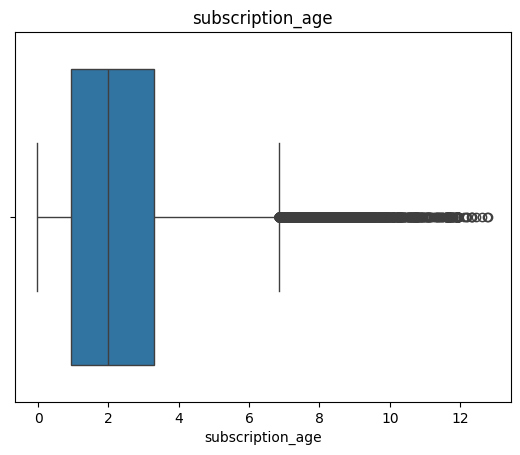

bill_avg: 3361 outliers


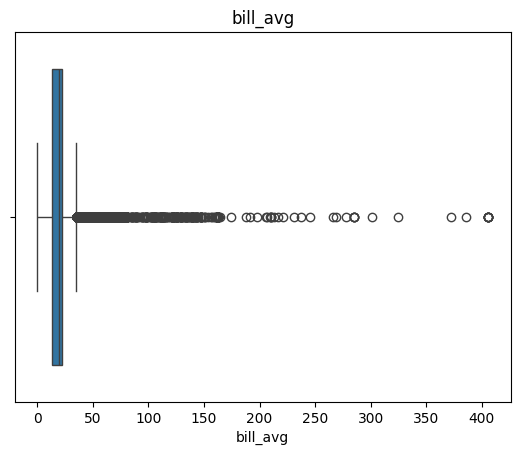

reamining_contract: 0 outliers


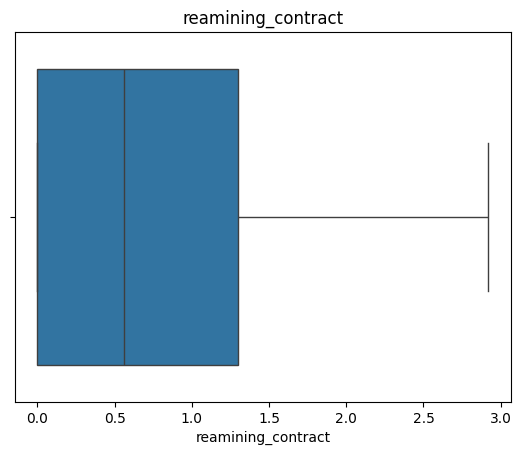

service_failure_count: 11866 outliers


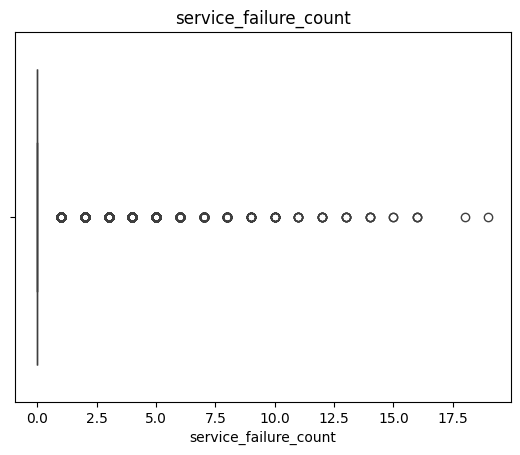

download_avg: 3473 outliers


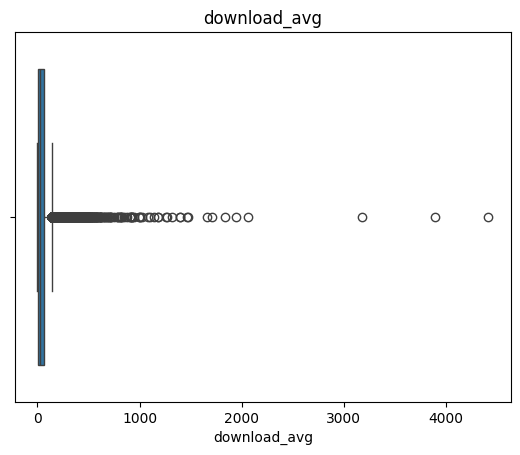

upload_avg: 4864 outliers


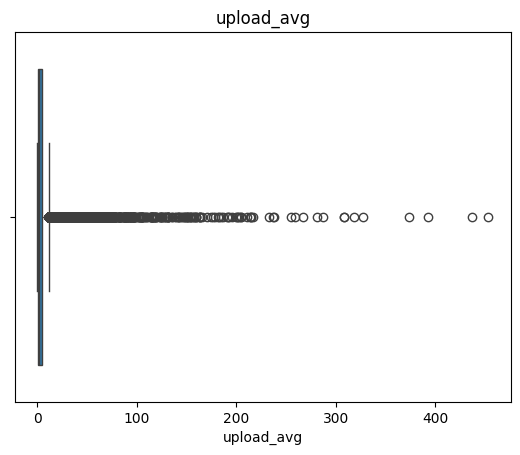

download_over_limit: 3901 outliers


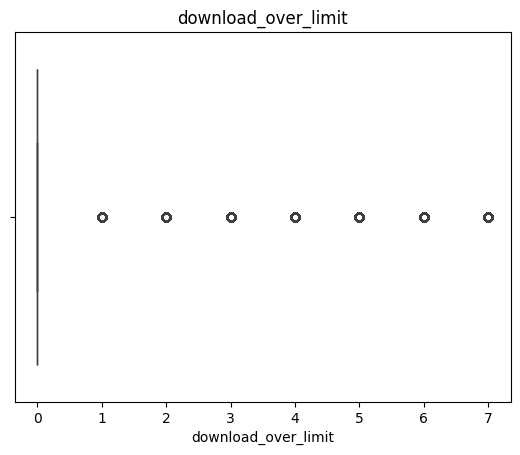

In [29]:
for col in num_features:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df1[(df1[col] < lower) | (df1[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")
    sns.boxplot(x=df1[col])
    plt.title(col)
    plt.show()

Проведений IQR-аналіз демонструє значну кількість зразків, які потенційно можуть бути викидами, наприклад, 11866 зразків (16%) для ознаки service_failure_count. Проте числові значення ознак потенціних викидів не є аномальними і можуть відображати розподіл реальних даних. Наприклад, для ознаки service_failure_count потенційні викиди мають значення, які є цілком реальними для цієї ознаки.

In [30]:
df1['service_failure_count'].value_counts()

,count
service_failure_count,
0,60027
1,7664
2,2453
3,901
4,395
5,201
6,97
7,58
8,37


Подивимось на діапазони значень інших числових ознак.

In [34]:
df1.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,reamining_contract_missing
count,7.189300e+04,71893.000000,71893.000000,71893.000000,71893.000000,50375.000000,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000
mean,8.432896e+05,0.815225,0.334066,2.455486,19.016844,0.710171,0.275674,43.689911,4.192076,0.208713,0.557078,0.299306
std,4.871708e+05,0.388117,0.471666,2.026856,13.188541,0.693979,0.818533,63.405963,9.818896,0.999647,0.496735,0.457957
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.211420e+05,1.000000,0.000000,0.940000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000,0.000000
50%,8.447570e+05,1.000000,0.000000,1.980000,19.000000,0.560000,0.000000,27.800000,2.100000,0.000000,1.000000,0.000000
75%,1.264775e+06,1.000000,1.000000,3.300000,22.000000,1.300000,0.000000,60.500000,4.800000,0.000000,1.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000,1.000000


Значення в цих діапазонах виглядають реальними, за винятком негативних значень для ознаки subscription_age, але це значення лише одне.

In [37]:
df1[df1['subscription_age']<0].value_counts()

,,,,,,,,,,,,count
id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,reamining_contract_missing,
1621523,0,0,-0.02,0,0.08,0,32.6,1.3,0,1,0,1


Таким чином, на цьому етапі потенційні викиди варто залишити в датасетах. Але має бути перевірка їхнього впливу на метрики моделей для прийняття подальшого рішення щодо їх видалення з датасетів.

Обчислимо метрики для обраних 4 датасетів в рамках різних моделей-класифікаторів та оберемо найкращий.

In [ ]:
def scale_data(data, test_size=0.2, random_state=42):
  X = data.drop(columns=['id', 'churn'])
  y = data['churn']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y, shuffle=True)

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  return X_train, X_test, y_train, y_test

In [ ]:
datasets = [df1_mean, df2, df1_mean_drop, df2_drop]
dataset_info = {
    0: "df1_mean",
    1: "df2",
    2: "df1_mean_drop",
    3: "df2_drop"
}

In [ ]:
def plot_cm(cm, model, cmap="Blues"):
  sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False)
  plt.title(f"Confusion matrix for {model}")
  plt.xlabel("Predicted values")
  plt.ylabel("Real values")
  plt.show()
  plt.close()


DF1_MEAN:

Logistic Regression Classification Report

               precision    recall  f1-score   support

           0       0.88      0.84      0.86      6369
           1       0.88      0.91      0.89      8010

    accuracy                           0.88     14379
   macro avg       0.88      0.87      0.88     14379
weighted avg       0.88      0.88      0.88     14379



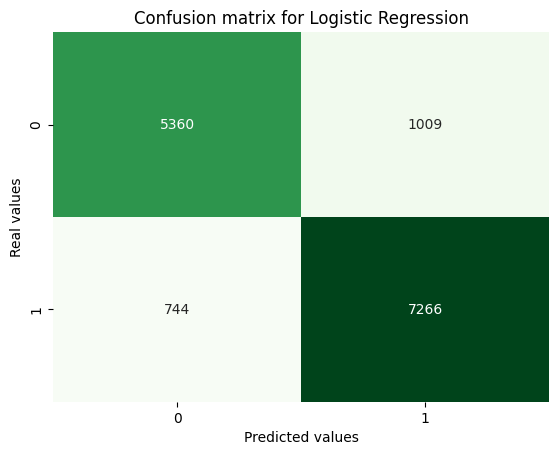


DF2:

Logistic Regression Classification Report

               precision    recall  f1-score   support

           0       0.89      0.89      0.89      6009
           1       0.84      0.84      0.84      4066

    accuracy                           0.87     10075
   macro avg       0.86      0.86      0.86     10075
weighted avg       0.87      0.87      0.87     10075



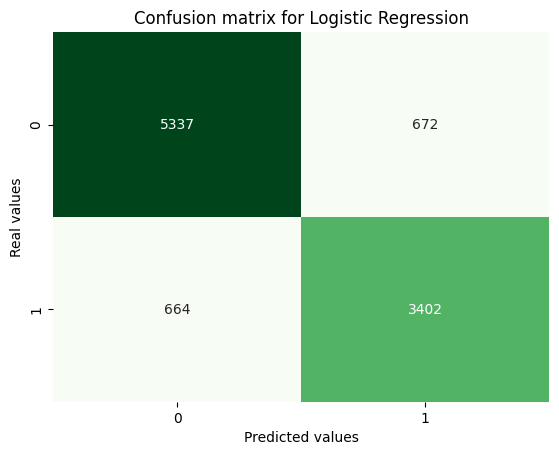


DF1_MEAN_DROP:

Logistic Regression Classification Report

               precision    recall  f1-score   support

           0       0.88      0.84      0.86      6369
           1       0.88      0.91      0.89      8010

    accuracy                           0.88     14379
   macro avg       0.88      0.87      0.88     14379
weighted avg       0.88      0.88      0.88     14379



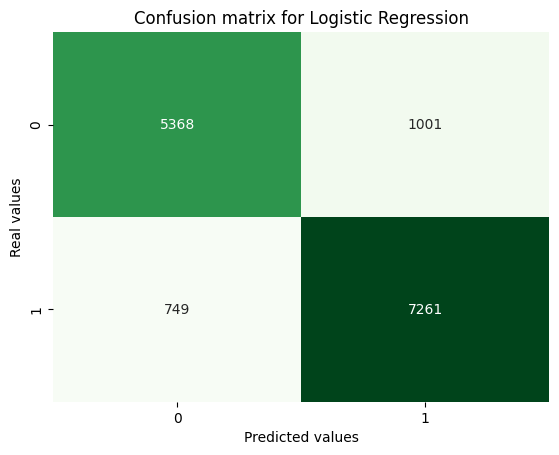


DF2_DROP:

Logistic Regression Classification Report

               precision    recall  f1-score   support

           0       0.89      0.89      0.89      6009
           1       0.83      0.84      0.84      4066

    accuracy                           0.87     10075
   macro avg       0.86      0.86      0.86     10075
weighted avg       0.87      0.87      0.87     10075



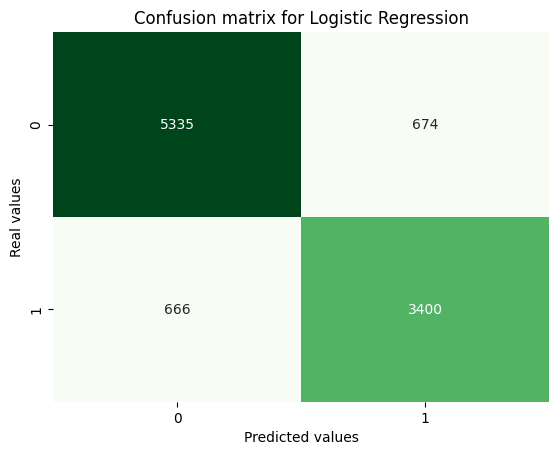

In [ ]:
def lr_model(data):
  X_train, X_test, y_train, y_test = scale_data(data)
  lr_model = LogisticRegression(random_state=42)
  lr_model.fit(X_train, y_train)
  y_pred_lr = lr_model.predict(X_test)
  return y_test, y_pred_lr

for i, ds in enumerate(datasets):
  print(f"\n{dataset_info[i].upper()}:\n")
  y_test, y_pred = lr_model(ds)
  print("Logistic Regression Classification Report\n\n", classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  plot_cm(cm, "Logistic Regression", cmap="Greens")


DF1_MEAN:

Gradient Boosting Classification Report:

               precision    recall  f1-score   support

           0       0.92      0.95      0.93      6369
           1       0.96      0.93      0.95      8010

    accuracy                           0.94     14379
   macro avg       0.94      0.94      0.94     14379
weighted avg       0.94      0.94      0.94     14379



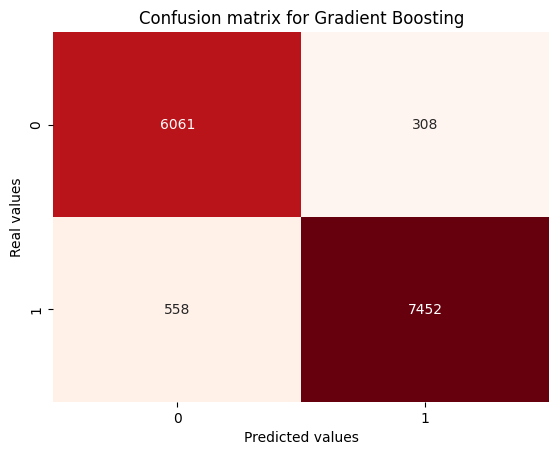


DF2:

Gradient Boosting Classification Report:

               precision    recall  f1-score   support

           0       0.92      1.00      0.96      6009
           1       0.99      0.88      0.93      4066

    accuracy                           0.95     10075
   macro avg       0.96      0.94      0.94     10075
weighted avg       0.95      0.95      0.95     10075



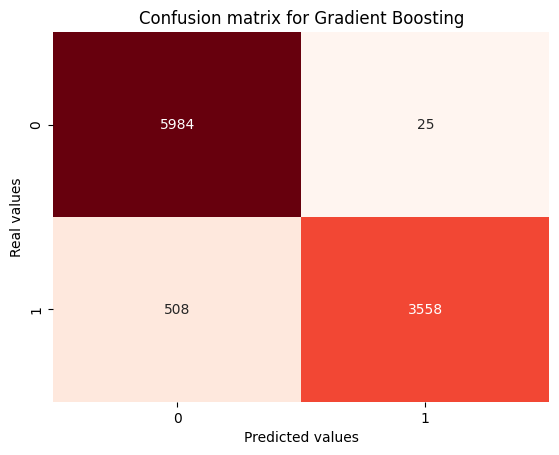


DF1_MEAN_DROP:

Gradient Boosting Classification Report:

               precision    recall  f1-score   support

           0       0.91      0.95      0.93      6369
           1       0.96      0.93      0.94      8010

    accuracy                           0.94     14379
   macro avg       0.93      0.94      0.94     14379
weighted avg       0.94      0.94      0.94     14379



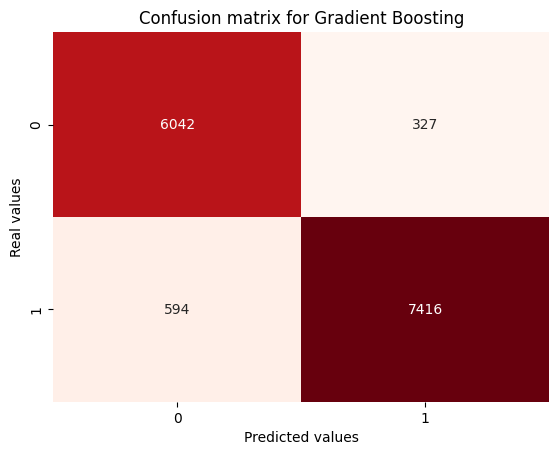


DF2_DROP:

Gradient Boosting Classification Report:

               precision    recall  f1-score   support

           0       0.92      1.00      0.95      6009
           1       0.99      0.87      0.93      4066

    accuracy                           0.94     10075
   macro avg       0.96      0.93      0.94     10075
weighted avg       0.95      0.94      0.94     10075



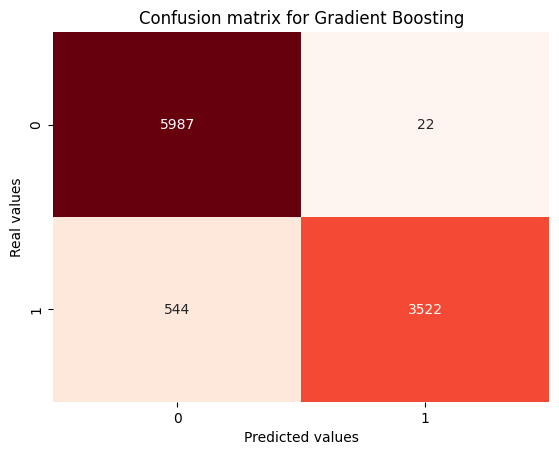

In [ ]:
def gbc(data, **kwargs):
  X_train, X_test, y_train, y_test = scale_data(data)
  gbc_model = GradientBoostingClassifier(**kwargs)
  gbc_model.fit(X_train, y_train)
  y_pred_gb = gbc_model.predict(X_test)
  return y_test, y_pred_gb

for i, ds in enumerate(datasets):
  print(f"\n{dataset_info[i].upper()}:\n")
  y_test, y_pred = gbc(ds, n_estimators=100, random_state=42)
  print("Gradient Boosting Classification Report:\n\n", classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  plot_cm(cm, "Gradient Boosting", cmap="Reds")


DF1_MEAN:

Random Forest Classification Report:

               precision    recall  f1-score   support

           0       0.92      0.95      0.94      6369
           1       0.96      0.94      0.95      8010

    accuracy                           0.94     14379
   macro avg       0.94      0.94      0.94     14379
weighted avg       0.94      0.94      0.94     14379



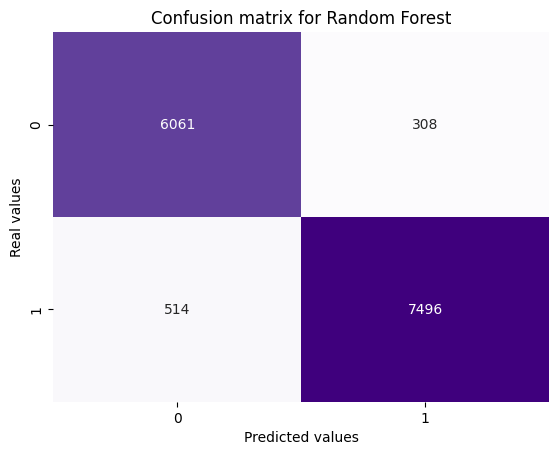


DF2:

Random Forest Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.99      0.96      6009
           1       0.99      0.89      0.93      4066

    accuracy                           0.95     10075
   macro avg       0.96      0.94      0.95     10075
weighted avg       0.95      0.95      0.95     10075



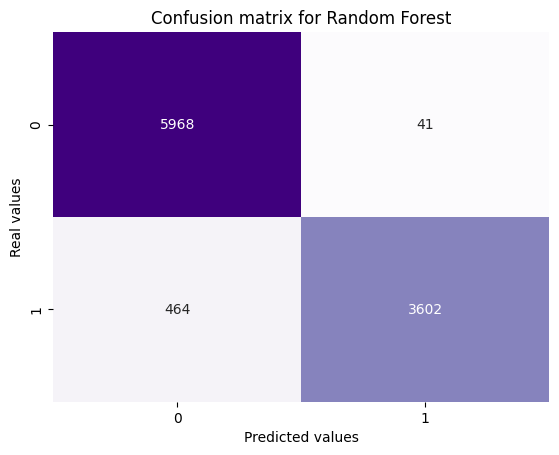


DF1_MEAN_DROP:

Random Forest Classification Report:

               precision    recall  f1-score   support

           0       0.91      0.95      0.93      6369
           1       0.96      0.92      0.94      8010

    accuracy                           0.93     14379
   macro avg       0.93      0.94      0.93     14379
weighted avg       0.94      0.93      0.93     14379



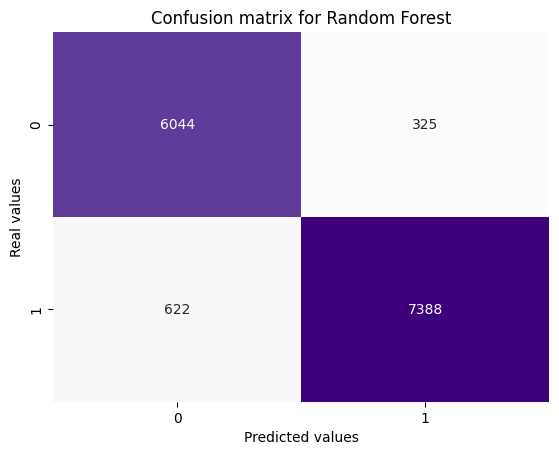


DF2_DROP:

Random Forest Classification Report:

               precision    recall  f1-score   support

           0       0.92      1.00      0.95      6009
           1       0.99      0.87      0.93      4066

    accuracy                           0.94     10075
   macro avg       0.95      0.93      0.94     10075
weighted avg       0.95      0.94      0.94     10075



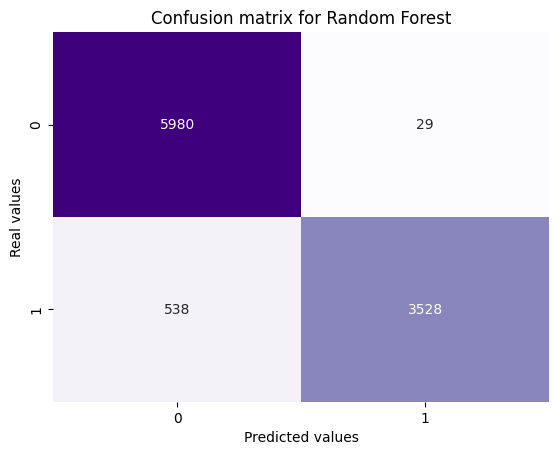

In [ ]:
def rfc(data, **kwargs):
  X_train, X_test, y_train, y_test = scale_data(data)
  rfc_model = RandomForestClassifier(**kwargs)
  rfc_model.fit(X_train, y_train)
  y_pred_rf = rfc_model.predict(X_test)
  return y_test, y_pred_rf

for i, ds in enumerate(datasets):
  print(f"\n{dataset_info[i].upper()}:\n")
  y_test, y_pred = rfc(ds, n_estimators=100, random_state=42)
  print("Random Forest Classification Report:\n\n", classification_report(y_test, y_pred))
  cm = confusion_matrix( y_test, y_pred)
  plot_cm(cm, "Random Forest", cmap="Purples")

In [ ]:
def svm(data, **kwargs):
  X_train, X_test, y_train, y_test = scale_data(data)
  svm_model = SVC(**kwargs)
  svm_model.fit(X_train, y_train)
  y_pred_svm = svm_model.predict(X_test)
  return y_test, y_pred_svm


DF1_MEAN:

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      6369
           1       0.88      0.92      0.90      8010

    accuracy                           0.88     14379
   macro avg       0.88      0.88      0.88     14379
weighted avg       0.88      0.88      0.88     14379



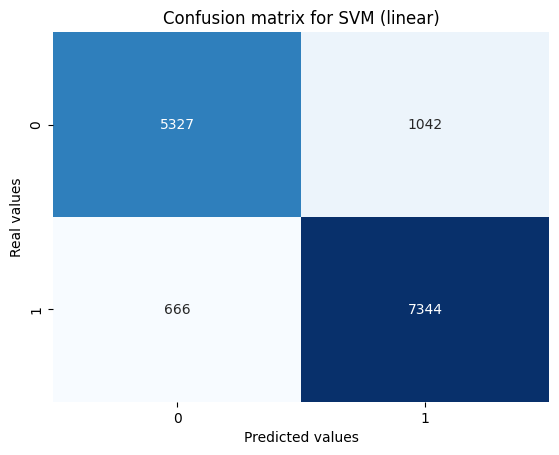


DF2:

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      6009
           1       0.84      0.84      0.84      4066

    accuracy                           0.87     10075
   macro avg       0.86      0.87      0.87     10075
weighted avg       0.87      0.87      0.87     10075



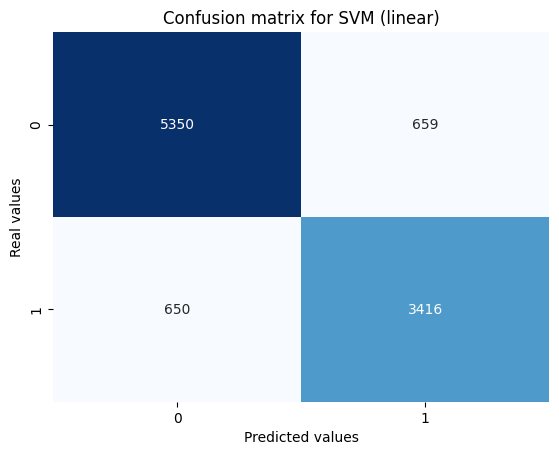


DF1_MEAN_DROP:

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      6369
           1       0.87      0.92      0.90      8010

    accuracy                           0.88     14379
   macro avg       0.88      0.88      0.88     14379
weighted avg       0.88      0.88      0.88     14379



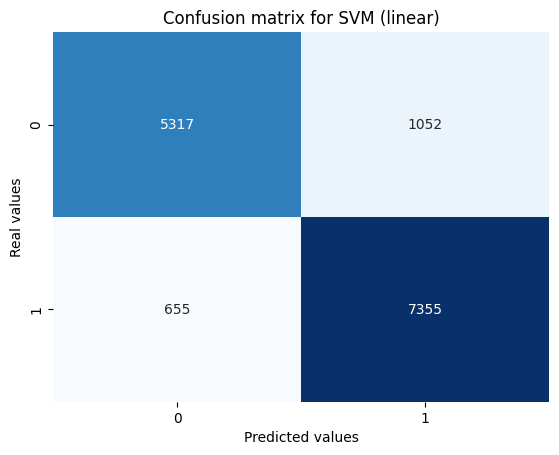


DF2_DROP:

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      6009
           1       0.84      0.84      0.84      4066

    accuracy                           0.87     10075
   macro avg       0.87      0.87      0.87     10075
weighted avg       0.87      0.87      0.87     10075



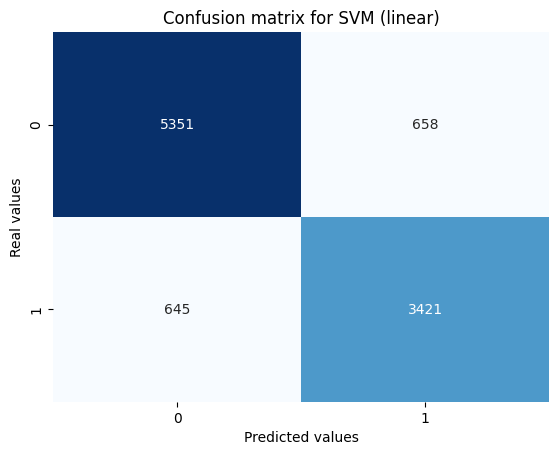

In [ ]:
for i, ds in enumerate(datasets):
  print(f"\n{dataset_info[i].upper()}:\n")
  y_test, y_pred = svm(ds, kernel="linear")
  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  plot_cm(cm, "SVM (linear)")


DF1_MEAN:

Linear SVM Classification Report

               precision    recall  f1-score   support

           0       0.88      0.83      0.86      6369
           1       0.87      0.91      0.89      8010

    accuracy                           0.88     14379
   macro avg       0.88      0.87      0.87     14379
weighted avg       0.88      0.88      0.88     14379



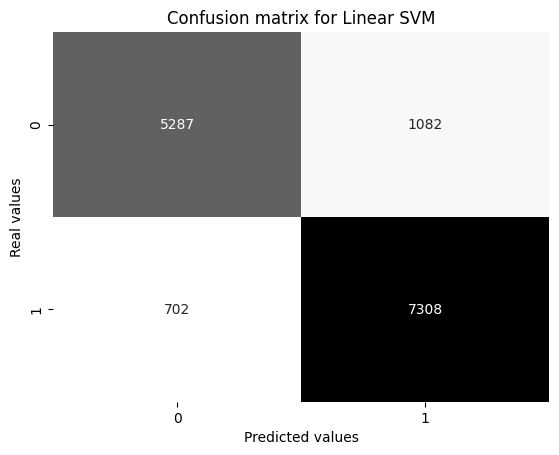


DF2:

Linear SVM Classification Report

               precision    recall  f1-score   support

           0       0.89      0.88      0.88      6009
           1       0.82      0.84      0.83      4066

    accuracy                           0.86     10075
   macro avg       0.86      0.86      0.86     10075
weighted avg       0.86      0.86      0.86     10075



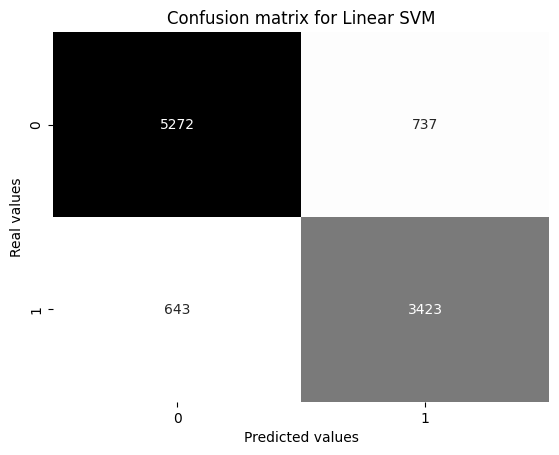


DF1_MEAN_DROP:

Linear SVM Classification Report

               precision    recall  f1-score   support

           0       0.88      0.83      0.85      6369
           1       0.87      0.91      0.89      8010

    accuracy                           0.87     14379
   macro avg       0.88      0.87      0.87     14379
weighted avg       0.88      0.87      0.87     14379



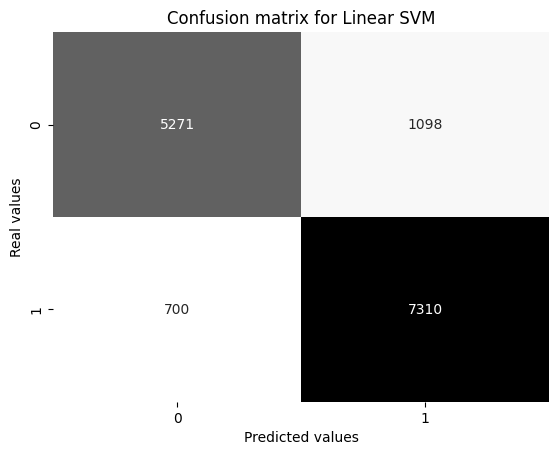


DF2_DROP:

Linear SVM Classification Report

               precision    recall  f1-score   support

           0       0.89      0.88      0.88      6009
           1       0.82      0.84      0.83      4066

    accuracy                           0.86     10075
   macro avg       0.86      0.86      0.86     10075
weighted avg       0.86      0.86      0.86     10075



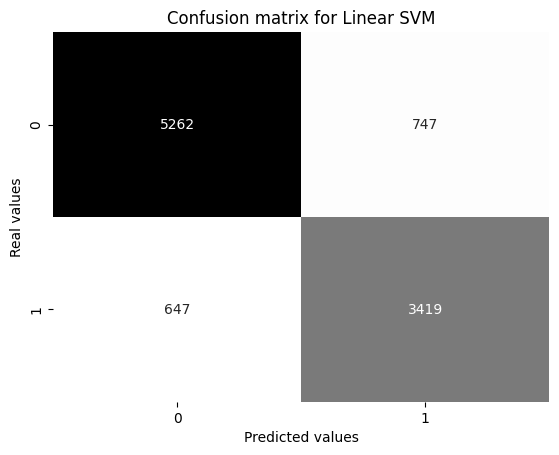

In [ ]:
def lsvm_model(data):
  X_train, X_test, y_train, y_test = scale_data(data)
  lsvm_model = LinearSVC(random_state=42)
  lsvm_model.fit(X_train, y_train)
  y_pred_lsvm = lsvm_model.predict(X_test)
  return y_test, y_pred_lsvm

for i, ds in enumerate(datasets):
  print(f"\n{dataset_info[i].upper()}:\n")
  y_test, y_pred = lsvm_model(ds)
  print("Linear SVM Classification Report\n\n", classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  plot_cm(cm, "Linear SVM", cmap="Greys")


DF1_MEAN:

SVM (RBF) Classification Report

               precision    recall  f1-score   support

           0       0.90      0.90      0.90      6369
           1       0.92      0.92      0.92      8010

    accuracy                           0.91     14379
   macro avg       0.91      0.91      0.91     14379
weighted avg       0.91      0.91      0.91     14379



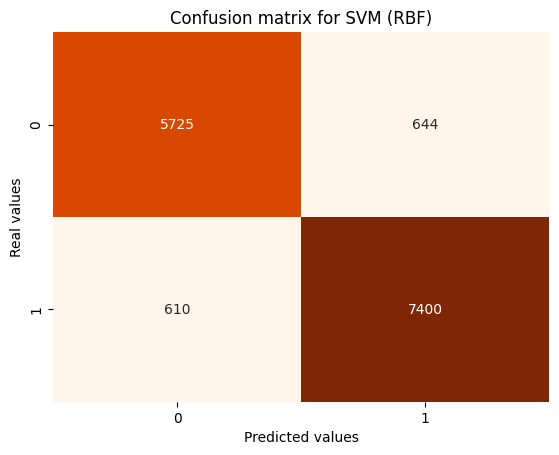


DF2:

SVM (RBF) Classification Report

               precision    recall  f1-score   support

           0       0.90      0.94      0.92      6009
           1       0.90      0.85      0.88      4066

    accuracy                           0.90     10075
   macro avg       0.90      0.89      0.90     10075
weighted avg       0.90      0.90      0.90     10075



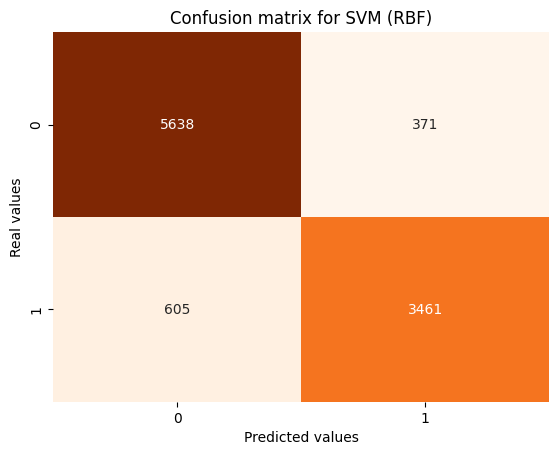


DF1_MEAN_DROP:

SVM (RBF) Classification Report

               precision    recall  f1-score   support

           0       0.90      0.90      0.90      6369
           1       0.92      0.92      0.92      8010

    accuracy                           0.91     14379
   macro avg       0.91      0.91      0.91     14379
weighted avg       0.91      0.91      0.91     14379



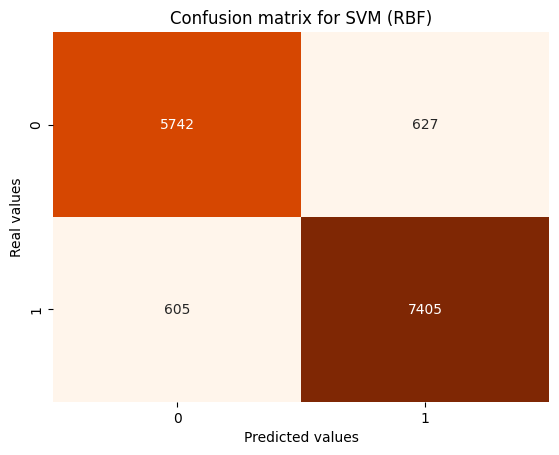


DF2_DROP:

SVM (RBF) Classification Report

               precision    recall  f1-score   support

           0       0.90      0.94      0.92      6009
           1       0.91      0.85      0.88      4066

    accuracy                           0.90     10075
   macro avg       0.90      0.89      0.90     10075
weighted avg       0.90      0.90      0.90     10075



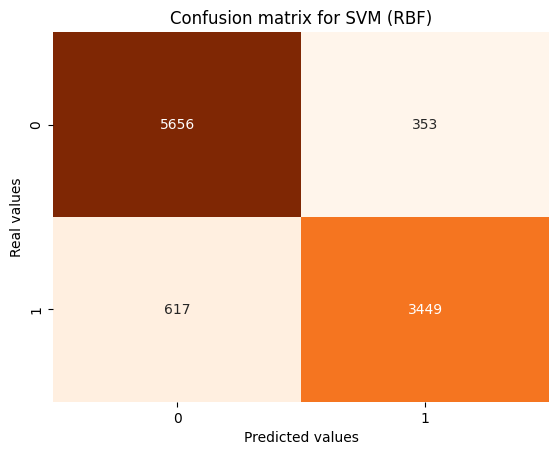

In [ ]:
for i, ds in enumerate(datasets):
  print(f"\n{dataset_info[i].upper()}:\n")
  y_test, y_pred = svm(ds, kernel="rbf")
  print("SVM (RBF) Classification Report\n\n", classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  plot_cm(cm, "SVM (RBF)", cmap="Oranges")


DF1_MEAN:

SVM (poly) Classification Report

               precision    recall  f1-score   support

           0       0.91      0.89      0.90      6369
           1       0.91      0.93      0.92      8010

    accuracy                           0.91     14379
   macro avg       0.91      0.91      0.91     14379
weighted avg       0.91      0.91      0.91     14379



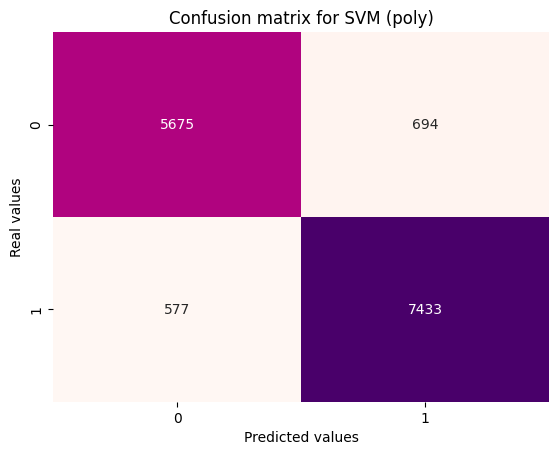


DF2:

SVM (poly) Classification Report

               precision    recall  f1-score   support

           0       0.90      0.93      0.91      6009
           1       0.89      0.84      0.86      4066

    accuracy                           0.89     10075
   macro avg       0.89      0.88      0.89     10075
weighted avg       0.89      0.89      0.89     10075



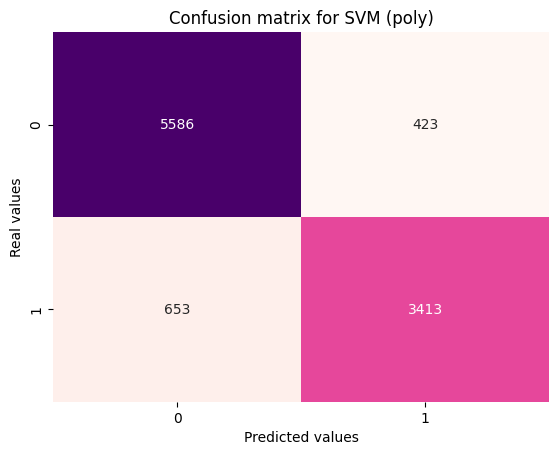


DF1_MEAN_DROP:

SVM (poly) Classification Report

               precision    recall  f1-score   support

           0       0.91      0.89      0.90      6369
           1       0.92      0.93      0.92      8010

    accuracy                           0.91     14379
   macro avg       0.91      0.91      0.91     14379
weighted avg       0.91      0.91      0.91     14379



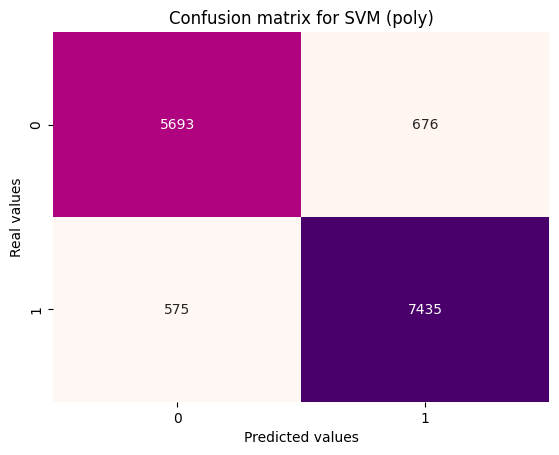


DF2_DROP:

SVM (poly) Classification Report

               precision    recall  f1-score   support

           0       0.90      0.93      0.91      6009
           1       0.89      0.84      0.86      4066

    accuracy                           0.89     10075
   macro avg       0.89      0.89      0.89     10075
weighted avg       0.89      0.89      0.89     10075



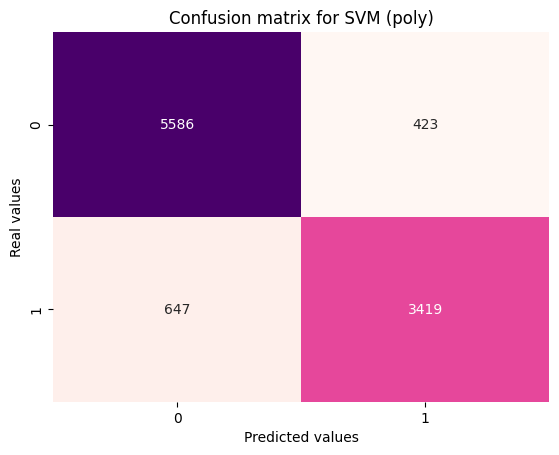

In [ ]:
for i, ds in enumerate(datasets):
  print(f"\n{dataset_info[i].upper()}:\n")
  y_test, y_pred = svm(ds, kernel="poly")
  print("SVM (poly) Classification Report\n\n", classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  plot_cm(cm, "SVM (poly)", cmap="RdPu")

Усі проаналізовані моделі (Logistic Regression, Gradient Boosting, Random Forest, Linear SVM, SVM/linear, SVM/rbf, SVM/poly) показали незначні відмінності (1-3% в accuracy) між тестовими датасетами. Найкращі результати дали моделі Gradient Boosting (94-95% accuracy) та Random Forest (93-95%). Для цих моделей відкидання ознак зі слабкою кореляцією з цільовою ознакою (датасети df1_mean_drop, df2_drop) дають або такі самі результати, що й датасети зі збереженими ознаками (df1_mean, df2), або трохи гірші. Отже відкидати ознаки bill_avg та service_failure_count немає потреби. Серед датасетів зі збереженими ознаками bill_avg та service_failure_count (df1_mean, df2) трохи кращі результати дає датасет з видаленими користувачами, для яких відсутні значення ознаки reamining_contract, тобто df2. Але різниця дуже невелика, тому варто порахувати f1-score для цих моделей з урахуванням крос-валідації, аби зменшити вплив випадковостей на результат.

In [ ]:
def gbc_for_cv(data, **kwargs):
  X_train, X_test, y_train, y_test = scale_data(data)
  gbc_model = GradientBoostingClassifier(**kwargs)
  return X_train, y_train, gbc_model

print("Gradient Boosting".upper())
for i, ds in enumerate(datasets):
  print(f"\n{dataset_info[i].upper()}:\n")
  X, y, model = gbc_for_cv(ds, n_estimators=100, random_state=42)
  scores = cross_val_score(model, X, y, cv=5, scoring='f1')
  print(f"f1-scores: {scores}\nMean f1-score: {scores.mean()}")

GRADIENT BOOSTING

DF1_MEAN:

f1-scores: [0.94409349 0.94168774 0.94461563 0.94178136 0.94452325]
Mean f1-score: 0.9433402936967626

DF2:

f1-scores: [0.92693316 0.93294271 0.93580367 0.93089364 0.93109079]
Mean f1-score: 0.9315327950170597

DF1_MEAN_DROP:

f1-scores: [0.94257238 0.93866245 0.94249049 0.93979907 0.94168637]
Mean f1-score: 0.9410421502840769

DF2_DROP:

f1-scores: [0.9196237  0.92595633 0.93154713 0.92305157 0.92525053]
Mean f1-score: 0.9250858539214771


In [ ]:
def rf_for_cv(data, **kwargs):
  X_train, X_test, y_train, y_test = scale_data(data)
  rf_model = RandomForestClassifier(**kwargs)
  return X_train, y_train, rf_model

print("Random Forest".upper())
for i, ds in enumerate(datasets):
  print(f"\n{dataset_info[i].upper()}:\n")
  X, y, model = rf_for_cv(ds, n_estimators=100, random_state=42)
  scores = cross_val_score(model, X, y, cv=5, scoring='f1')
  print(f"f1-scores: {scores}\nMean f1-score: {scores.mean()}")

RANDOM FOREST

DF1_MEAN:

f1-scores: [0.94585635 0.94457603 0.94720227 0.9454488  0.94688731]
Mean f1-score: 0.9459941547277569

DF2:

f1-scores: [0.92981599 0.93590159 0.94054927 0.93517465 0.93623235]
Mean f1-score: 0.935534771860189

DF1_MEAN_DROP:

f1-scores: [0.94029851 0.93659622 0.94087771 0.93838112 0.9391924 ]
Mean f1-score: 0.9390691901956509

DF2_DROP:

f1-scores: [0.92092717 0.92652594 0.93181448 0.92439185 0.92607131]
Mean f1-score: 0.9259461506918057


З отриманих даних видно, що усереднений в процесі крос-валідації f1-score трохи вищий для датасету df1_mean для обох моделей. Спробуємо також датасети з заміною пропущених значень reamining_contract на медіану (df1_median) та моду (df1_mode).

In [ ]:
df1_median = df1.copy()
df1_median.loc[:, 'reamining_contract'] = df1_median['reamining_contract'].fillna(df1_median['reamining_contract'].median())
df1_median.isna().sum()

,0
id,0
is_tv_subscriber,0
is_movie_package_subscriber,0
subscription_age,0
bill_avg,0
reamining_contract,0
service_failure_count,0
download_avg,0
upload_avg,0
download_over_limit,0


In [ ]:
df1_mode = df1.copy()
df1_mode.loc[:, 'reamining_contract'] = df1_mode['reamining_contract'].fillna(df1_mode['reamining_contract'].mode()[0])
df1_mode.isna().sum()

,0
id,0
is_tv_subscriber,0
is_movie_package_subscriber,0
subscription_age,0
bill_avg,0
reamining_contract,0
service_failure_count,0
download_avg,0
upload_avg,0
download_over_limit,0


In [ ]:
df1_datasets = [df1_mean, df1_median, df1_mode]
df1_dataset_info = {
    0: "df1_mean",
    1: "df_median",
    2: "df1_mode"
}

In [ ]:
print("Gradient Boosting".upper())
for i, ds in enumerate(df1_datasets):
  print(f"\n{df1_dataset_info[i].upper()}:\n")
  X, y, model = gbc_for_cv(ds, n_estimators=100, random_state=42)
  scores = cross_val_score(model, X, y, cv=5, scoring='f1')
  print(f"f1-scores: {scores}\nMean f1-score: {scores.mean()}")

GRADIENT BOOSTING

DF1_MEAN:

f1-scores: [0.94409349 0.94168774 0.94461563 0.94178136 0.94452325]
Mean f1-score: 0.9433402936967626

DF_MEDIAN:

f1-scores: [0.94434357 0.94133439 0.94478237 0.94149273 0.94424319]
Mean f1-score: 0.9432392476622677

DF1_MODE:

f1-scores: [0.94427318 0.94207823 0.94472998 0.94211608 0.94474659]
Mean f1-score: 0.9435888121117207


In [ ]:
print("Random Forest".upper())
for i, ds in enumerate(df1_datasets):
  print(f"\n{df1_dataset_info[i].upper()}:\n")
  X, y, model = rf_for_cv(ds, n_estimators=100, random_state=42)
  scores = cross_val_score(model, X, y, cv=5, scoring='f1')
  print(f"f1-scores: {scores}\nMean f1-score: {scores.mean()}")

RANDOM FOREST

DF1_MEAN:

f1-scores: [0.94585635 0.94457603 0.94720227 0.9454488  0.94688731]
Mean f1-score: 0.9459941547277569

DF_MEDIAN:

f1-scores: [0.94562387 0.94377764 0.94652871 0.94419855 0.94658777]
Mean f1-score: 0.9453433060034268

DF1_MODE:

f1-scores: [0.94538279 0.94472123 0.94626205 0.94514701 0.94701987]
Mean f1-score: 0.9457065918191457


Видно, що в межах імовірної похибки усі три датасети дають дуже схожі результати (f1-score 0,943-0,946). Отже, для подальшого тренування моделей Gradient Boosting та Random Forest з оптимізованими гіперпараметрами можна рекомендувати використовувати один з них, наприклад, df1_mean. Але варто зазначити, що всі 6 випробуваних тестових датасетів робочі і можуть бути використані для побудови моделей (особливо в разі використання нових, нетестованих тут моделей). Дисбаланс в метриках між класами для датасету df1_mean в рамках моделей Gradient Boosting і Random Forest незначний (f1 score 93% vs. 96%), отже балансувати класи на цьому етапі не потрібно. Можна переходити до оптимізації параметрів для цих двох моделей, використовуючи обраний датасет - df1_mean.

In [ ]:
# df1_mean.to_csv('df1_mean.csv', index=False)

In [ ]:
# files.download('df1_mean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df1_mean.to_csv(DATA_PATH, index=False)